In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# drop unknown values and id classification
df = df[df['bare_nucleoli'] != '?']
df = df.drop(columns = 'id')
df = df.apply(pd.to_numeric)

In [5]:
df.describe()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
# prelimary graph: histogram seperated by 'class'. 
# bar plot of mean values, plus standard errors 
# overlayed, maybe one combining both classes (all samples)

# something regression of mitoses rate

In [7]:
# seperate the mitosis rates by class
benign_mitosis = df.loc[df['class'] == 2, ['mitoses']]
malignant_mitosis = df.loc[df['class'] == 4, ['mitoses']]

Text(0, 0.5, 'number of samples')

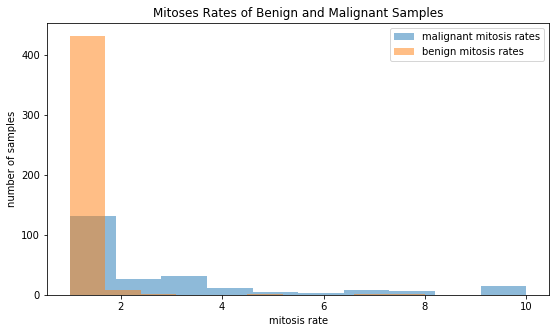

In [8]:
# graphs the mitosis rates histogram of benign and malignant celss
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(1,1,1)
for i in range(2):
    if i==1:
        ax.hist(benign_mitosis['mitoses'], alpha = 0.5, label='benign mitosis rates')
    else:
        ax.hist(malignant_mitosis['mitoses'], alpha = 0.5, label='malignant mitosis rates')
plt.legend()
plt.title('Mitoses Rates of Benign and Malignant Samples')
plt.xlabel('mitosis rate')
plt.ylabel('number of samples')

# WE DID NOT USE THIS GRAPH 

In [9]:
# https://stackoverflow.com/questions/33742588/pandas-split-dataframe-by-column-value/33742822
# seperates dataframe into malignant and benign
malignant, benign=[x for _, x in df.groupby(df['class'] < 3)]

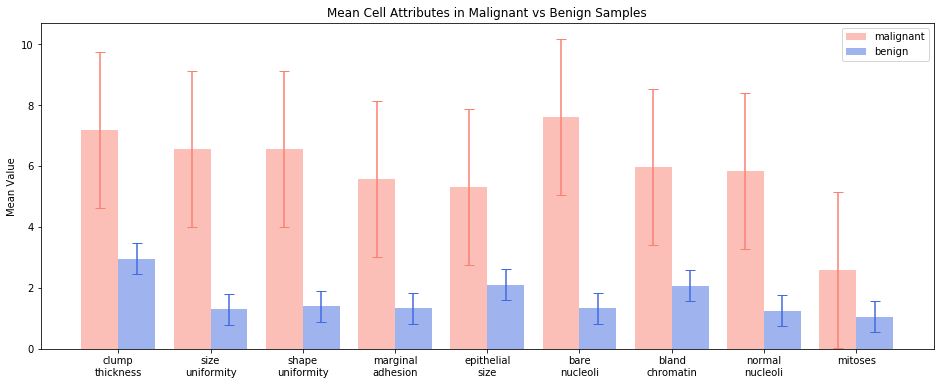

In [10]:
cell_means = np.zeros(9)
cell_stds = np.zeros(9)
codes = np.arange(0, 9)

fig = plt.figure(figsize = (16,6))
ax1 = fig.add_subplot(1,1,1)

# for loop to compute mean values for all columns in malignant samples
for i in range(9):
    cell_means[i] = malignant.iloc[:, i].mean()
    cell_stds = malignant.iloc[:, i].std()
ax1.bar(codes-0.2, cell_means, align='center', width=0.4, alpha=0.5, label='malignant', color='salmon')
ax1.errorbar(codes-0.2, cell_means, yerr=cell_stds,linestyle='none', capsize=5, color='salmon')

# for loop to compute mean values for benign samples
cell_means = np.zeros(9)
cell_stds = np.zeros(9)
for i in range(9):
    cell_means[i] = benign.iloc[:, i].mean()
    cell_stds = benign.iloc[:, i].std()
ax1.bar(codes+0.2, cell_means, align='center', width=0.4, alpha=0.5, label='benign', color='royalblue')
ax1.errorbar(codes+0.2, cell_means, yerr=cell_stds,linestyle='none', capsize=5, color='royalblue')

classifier_names = ('clump\nthickness', 'size\nuniformity', 'shape\nuniformity', 'marginal\nadhesion', 
                    'epithelial\nsize', 'bare\nnucleoli', 'bland\nchromatin', 'normal\nnucleoli', 'mitoses')
plt.xticks(codes, classifier_names)
plt.legend()
plt.title('Mean Cell Attributes in Malignant vs Benign Samples')
plt.ylabel('Mean Value')

plt.savefig("Mean Cell Attributes.png")

In [11]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


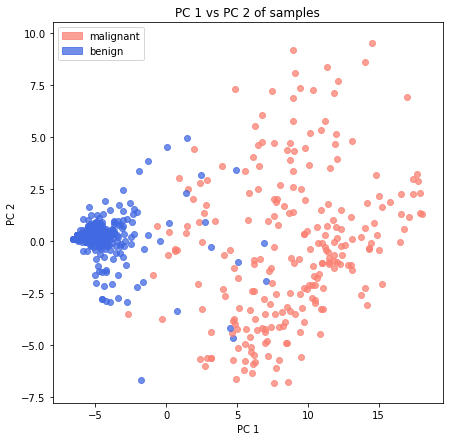

In [12]:
# Making a PCA analysis for the Data

# creating seperate numpy array of labels and values
df_labels = df.iloc[:, -1].values #contains class (either 2 or 4)
df_values = df.iloc[:, 0:10].values 

# importing PCA
from sklearn.decomposition import PCA

# running and fitting PCA on values of samples
pca = PCA(n_components = 2)
pca.fit(df_values)
pcs = pca.transform(df_values)

fig, ax = plt.subplots(figsize=(7, 7))

# manually making legend for cancer type information. Got code from:
# https://stackoverflow.com/questions/39500265/manually-add-legend-items-python-matplotlib
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='salmon', label='malignant',
                           alpha=0.75)
blue_patch = mpatches.Patch(color='royalblue', label='benign',
                            alpha=0.75)
plt.legend(handles=[red_patch, blue_patch])


# plotting the each point with associated colors
for i in range(len(df_labels)):
    # if its associated with label 4: then its malignant
    if df_labels[i] == 4:
        ax.scatter(pcs[i,0], pcs[i,1], color='salmon', alpha=0.75)
    # else if its associated with label 2: then its benign
    elif df_labels[i] == 2:
        ax.scatter(pcs[i,0], pcs[i,1], color='royalblue',alpha=0.75)

plt.title('PC 1 vs PC 2 of samples')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.savefig("Data PC1 vs PC2.png")

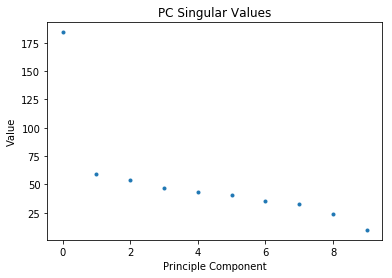

In [13]:
# plotting pca singular values
pca = PCA()
pca.fit(df_values)

plt.plot(pca.singular_values_, '.')
plt.title('PC Singular Values')
plt.xlabel('Principle Component')
plt.ylabel('Value')
plt.savefig("PC Singular Values.png")

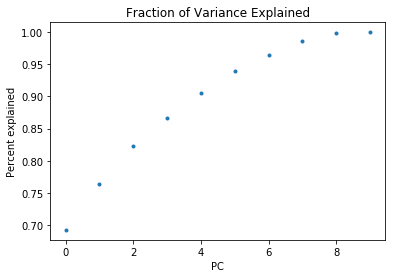

In [14]:
plt.plot(pca.explained_variance_ratio_.cumsum(), '.')
plt.title('Fraction of Variance Explained')
plt.xlabel('PC')
plt.ylabel('Percent explained')
plt.savefig("Fraction of Variance Explained.png")

In [13]:
# Making Initial Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# Function that splits training and testing data randomly
def split(df, frac_p):
    train_data = df.sample(frac = frac_p)
    test_data = df.drop(train_data.index)
    return(train_data, test_data)

In [15]:
# splitting training and testing data
train_data, test_data = split(df, 0.7)
train_values = train_data.iloc[:, 0:10].values
train_labels  = train_data.iloc[:, -1].values
train_labels = train_labels.reshape(478, 1)

test_values = test_data.iloc[:, 0:10].values
test_labels  = test_data.iloc[:, -1].values

In [16]:
pca = PCA(n_components = 2)
pca.fit(train_values)
pcs = pca.transform(train_values)

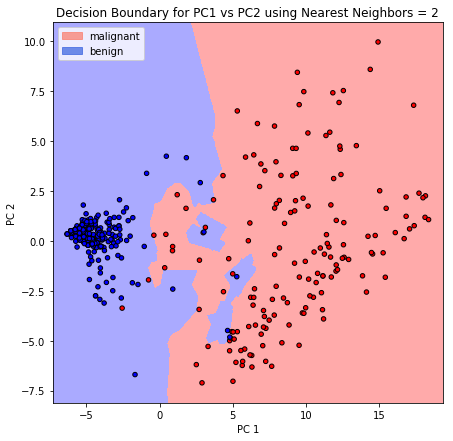

In [17]:
# Displaying the Decision Boundary when doing Nearest Neighbors
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 2

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = pcs
y = train_labels

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#AAAAFF', '#AAFFAA', '#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF', '#00FF00','#FF0000'])

for weights in ['uniform']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y.ravel())

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

red_patch = mpatches.Patch(color='salmon', label='malignant',
                           alpha=0.75)
blue_patch = mpatches.Patch(color='royalblue', label='benign',
                            alpha=0.75)
plt.legend(handles=[red_patch, blue_patch])

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title("Decision Boundary for PC1 vs PC2 using Nearest Neighbors = 2")
#plt.savefig("KNN1.png")
plt.show()

0.9512195121951219


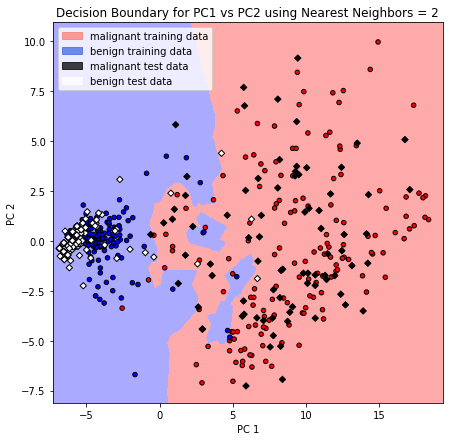

In [18]:
# Displaying the Decision Boundary when doing Nearest Neighbors
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 2

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = pcs
y = train_labels

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#AAAAFF', '#AAFFAA', '#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF', '#00FF00','#FF0000'])

for weights in ['uniform']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y.ravel())

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
#plotting test points
cmap_test = ListedColormap(['white','black'])
pca = PCA(n_components = 2)
pca.fit(test_values)
test_pcs = pca.transform(test_values)
w = test_labels
plt.scatter(test_pcs[:, 0], test_pcs[:, 1], c=w.ravel(), marker = "D",  cmap=cmap_test,
            edgecolor='k', s=20)

red_patch = mpatches.Patch(color='salmon', label='malignant training data',alpha=0.75)
blue_patch = mpatches.Patch(color='royalblue', label='benign training data',alpha=0.75)
black_patch = mpatches.Patch(color='black', label='malignant test data',alpha=0.75)
white_patch = mpatches.Patch(color='white', label='benign test data',alpha=0.75)
plt.legend(handles=[red_patch, blue_patch, black_patch, white_patch])

score = clf.score(test_pcs, test_labels)
print(score)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title("Decision Boundary for PC1 vs PC2 using Nearest Neighbors = 2")
#plt.savefig("KNN2.png")
plt.show()

In [21]:
# function adapted from HW5 to take in classifier and give % accuracy in test data
def class_accuracy(model, X, r, test_frac, reps):
    total = np.zeros(reps)
    for i in range(reps):
        # split into random test and train arrays
        train_data, test_data = split(X, test_frac)
        
        # seperating train values/labels and test values/labels
        train_values = train_data.iloc[:, 0:10].values
        train_labels  = train_data.iloc[:, -1].values
        test_values = test_data.iloc[:, 0:10].values
        test_labels  = test_data.iloc[:, -1].values
        
        # making PCA
        pca = PCA(n_components = r)
        pca.fit(train_values)
        Xtrain_trans = pca.transform(train_values)
        test_trans = pca.transform(test_values)

        classifier = mymodel
        classifier.fit(Xtrain_trans, train_labels)

        score = classifier.score(test_trans, test_labels)
        total[i] = score
    #print("mean accuracy for classifier is", total / reps)
    cv_acc = np.mean(total) * 100
    cv_std = np.std(total) * 100
    return(cv_acc, cv_std)

In [22]:
# cross_val_class_accuracy(model, df, #components, test_frac = 0.3, #of reps)

# KNN 2 neighbors, r=2 components
mymodel=KNeighborsClassifier(n_neighbors=2)
knn_acc_1, knn_std = class_accuracy(mymodel, df, 2, 0.3, 100)
print(knn_acc_1, knn_std)

94.77405857740585 1.2003264554807138


In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [24]:
#LDA, r=2 components
mymodel=LinearDiscriminantAnalysis()
lda_acc_1, lda_std = class_accuracy(mymodel, df, 2, 0.3, 100)
print(lda_acc_1, lda_std)

96.00000000000001 0.5761917986645017


In [20]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
from sklearn import svm

In [26]:
# support vector machine, rbf kernel, r = 2
mymodel = svm.SVC(kernel='rbf', gamma = 0.7)
svm_acc, svm_std = class_accuracy(mymodel, df, 2, 0.3, 100)
print(svm_acc, svm_std)

96.53556485355651 0.680685114113641


[94.77 96.   96.54]


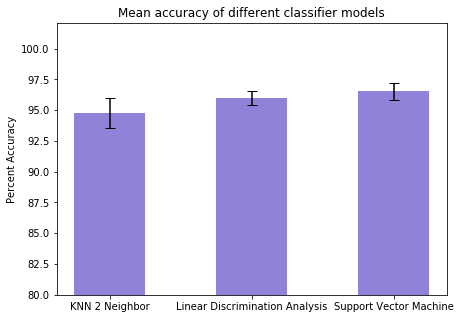

In [77]:
classifier_names = ('KNN 2 Neighbor', 'Linear Discrimination Analysis', 'Support Vector Machine')
cross_acc = np.array([knn_acc_1,lda_acc_1, svm_acc])
cross_std = np.array([knn_std, lda_std, svm_std])
fig = plt.figure(figsize = (7,5))
ax1 = fig.add_subplot(1,1,1)

ax1.bar(np.arange(0, 3), cross_acc, align = 'center', color = 'slateblue', alpha=0.75, width=0.5)
ax1.errorbar(np.arange(0, 3), cross_acc, yerr=cross_std, linestyle='none', capsize=5, color='black')

plt.ylim(bottom = 80)
plt.xticks( np.arange(0, 3), classifier_names)
plt.ylabel('Percent Accuracy')
plt.title('Mean accuracy of different classifier models')

print(cross_acc)
plt.savefig("means.png")

In [22]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

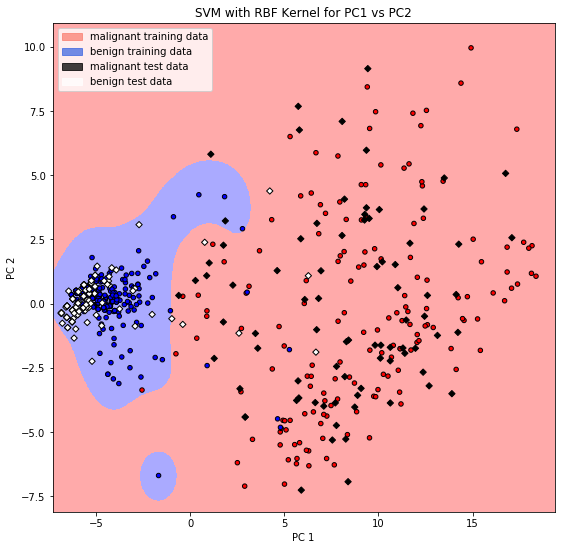

In [23]:
# Plotting SVM 
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
from sklearn import svm, datasets
# Take the first two features. We could avoid this by using a two-dim dataset
X = pcs
y = train_labels

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel='rbf', gamma='auto',  C=C)
clf.fit(X, y.ravel())

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
#cmap_light = ListedColormap(['#DBDBFF', '#AAFFAA', '#FFD3D3'])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(9,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plot_contours(ax, clf, xx, yy,
              cmap=cmap_light, alpha=0.8)

# Plot Test Points
cmap_test = ListedColormap(['white','black'])
pca = PCA(n_components = 2)
pca.fit(test_values)
test_pcs = pca.transform(test_values)
w = test_labels
plt.scatter(test_pcs[:, 0], test_pcs[:, 1], c=w.ravel(), marker = "D",  cmap=cmap_test,
            edgecolor='k', s=20)

red_patch = mpatches.Patch(color='salmon', label='malignant training data',
                           alpha=0.75)
blue_patch = mpatches.Patch(color='royalblue', label='benign training data',
                            alpha=0.75)
black_patch = mpatches.Patch(color='black', label='malignant test data',
                            alpha=0.75)
white_patch = mpatches.Patch(color='white', label='benign test data',
                            alpha=0.75)
plt.legend(handles=[red_patch, blue_patch, black_patch, white_patch])
plt.title("SVM with RBF Kernel for PC1 vs PC2")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
#plt.savefig("SVM2.png")
plt.show()

In [ ]:
# Plotting SVM 
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
from sklearn import svm, datasets
# Take the first two features. We could avoid this by using a two-dim dataset
X = pcs
y = train_labels

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel='rbf', gamma='auto',  C=C)
clf.fit(X, y.ravel())

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
#cmap_light = ListedColormap(['#DBDBFF', '#AAFFAA', '#FFD3D3'])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(9,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plot_contours(ax, clf, xx, yy,
              cmap=cmap_light, alpha=0.8)

red_patch = mpatches.Patch(color='salmon', label='malignant',
                           alpha=0.75)
blue_patch = mpatches.Patch(color='royalblue', label='benign',
                            alpha=0.75)
plt.legend(handles=[red_patch, blue_patch])
plt.title("SVM with RBF Kernel for PC1 vs PC2")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
#plt.savefig("SVM1.png")
plt.show()

In [24]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(pcs, train_labels.ravel())

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

Text(0, 0.5, 'PC 2')

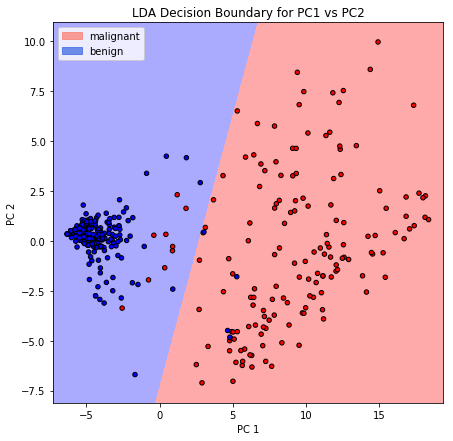

In [25]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = LDA.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(7,7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

red_patch = mpatches.Patch(color='salmon', label='malignant',
                           alpha=0.75)
blue_patch = mpatches.Patch(color='royalblue', label='benign',
                            alpha=0.75)
plt.legend(handles=[red_patch, blue_patch])
plt.title("LDA Decision Boundary for PC1 vs PC2")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
#plt.savefig("LDA1.png")

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = LDA.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(7,7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


cmap_test = ListedColormap(['white','black'])
pca = PCA(n_components = 2)
pca.fit(test_values)
test_pcs = pca.transform(test_values)
w = test_labels
plt.scatter(test_pcs[:, 0], test_pcs[:, 1], c=w.ravel(), marker = "D",  cmap=cmap_test,
            edgecolor='k', s=20)

red_patch = mpatches.Patch(color='salmon', label='malignant training data',
                           alpha=0.75)
blue_patch = mpatches.Patch(color='royalblue', label='benign training data',
                            alpha=0.75)
black_patch = mpatches.Patch(color='black', label='malignant test data',
                            alpha=0.75)
white_patch = mpatches.Patch(color='white', label='benign test data',
                            alpha=0.75)
plt.legend(handles=[red_patch, blue_patch, black_patch, white_patch])
plt.title("LDA Decision Boundary for PC1 vs PC2")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
#plt.savefig("LDA2.png")
plt.show()

Text(0.5, 0, 'gamma value')

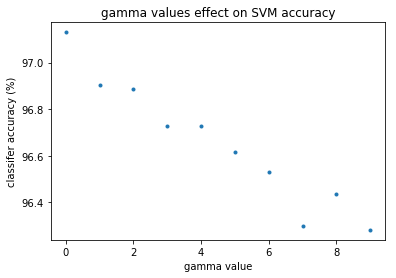

In [55]:
# gamma value optimisation for RBF kernel in SVM
gamma_vals = []
for i in np.arange(0.1, 1.1 , 0.1):
    mymodel = svm.SVC(kernel='rbf', gamma = i)
    svm_acc1, svm_std1 = class_accuracy(mymodel, df, 2, 0.3, 100)
    gamma_vals.append(svm_acc1)
mymodel = svm.SVC(kernel='rbf', gamma ='auto')
svm_acc1, svm_std1 = class_accuracy(mymodel, df, 2, 0.3, 100)
y_line = svm_acc1
plt.plot(gamma_vals, '.')
plt.title('gamma values effect on SVM accuracy')
plt.ylabel('classifer accuracy (%)')
plt.xlabel('gamma value')

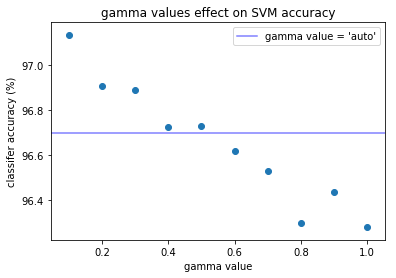

In [69]:
labels_val = np.zeros(20).reshape(10,2)
labels_val[:, 1] = gamma_vals
labels_val[:, 0] = np.arange(0.1, 1.1, 0.1)
plt.scatter(labels_val[:, 0], labels_val[:, 1])
plt.axhline(y = y_line, label = "gamma value = 'auto'", color='b', alpha = 0.5)
plt.legend()
plt.title('gamma values effect on SVM accuracy')
plt.ylabel('classifer accuracy (%)')
plt.xlabel('gamma value')
plt.savefig('gammavals.png')

In [3]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [classes[unique_labels(y_true, y_pred)]]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap='BuPu', )
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels= ["benign", "malignant"], yticklabels=["benign", "malignant"],
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

NameError: name 'plt' is not defined

In [4]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='rbf', gamma = 'auto')
y_pred = classifier.fit(pcs, train_labels.ravel()).predict(test_pcs)

np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(test_labels, y_pred, normalize=True,
                      title='Normalized confusion matrix for SVM (RBF Kernel)')

plt.savefig("SVM Confusion.png")
plt.show()

NameError: name 'svm' is not defined

In [ ]:
classifier = neighbors.KNeighborsClassifier(n_neighbors = 2)
y_pred = classifier.fit(pcs, train_labels.ravel()).predict(test_pcs)

np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(test_labels, y_pred, normalize=True,
                      title='Normalized confusion matrix for Nearest Neighbors')

plt.savefig("KNN Confusion.png")
plt.show()

Normalized confusion matrix
[[0.98 0.02]
 [0.04 0.96]]


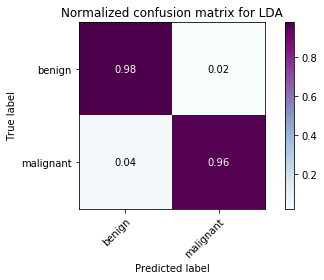

In [73]:
classifier = LinearDiscriminantAnalysis()
y_pred = classifier.fit(pcs, train_labels.ravel()).predict(test_pcs)

np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(test_labels, y_pred, normalize=True,
                      title='Normalized confusion matrix for LDA')

plt.savefig("LDA Confusion.png")
plt.show()